<a href="https://colab.research.google.com/github/LuisRodriguez1985/Abandono-de-Empleados/blob/main/DataSet_Abandono_Empleados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TU PRIMERA SEMANA COMO DATA SCIENTIST (POR DS4B)

## DIA 1: CONFIGURACIÓN DEL ENTORNO

### CARGA DE LIBRERIAS

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### CARGA DE LOS DATOS

Antes de continuar deberás:

* Haber descargado los datos de la plataforma

* Haberlos descomprimido en alguna carpeta de tu disco duro

* Haberlos subido a Colab mediante el explorador de archivos (icono de carpeta - icono de subir archivo)

In [77]:
df = pd.read_csv("/content/sample_data/AbandonoEmpleados.csv", sep = ';', index_col= 'id', na_values='#N/D')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

### ANALISIS DE DATOS NULOS

Vamos a dectectar los nulos. 

In [79]:
df.isna().sum().sort_values(ascending = False) #identificacion de los nuulos, aqui hace un conteo y despues se ordena de manera ascendente  

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

## DIA 2: BUSINESS ANALYTICS

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

### ANÁLISIS DE NULOS

In [81]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Conclusiones:

anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables

sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA

In [82]:
df.drop(columns = ["anos_en_puesto","conciliacion"], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


### EDA VARIABLES CATEGÓRICAS

In [83]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

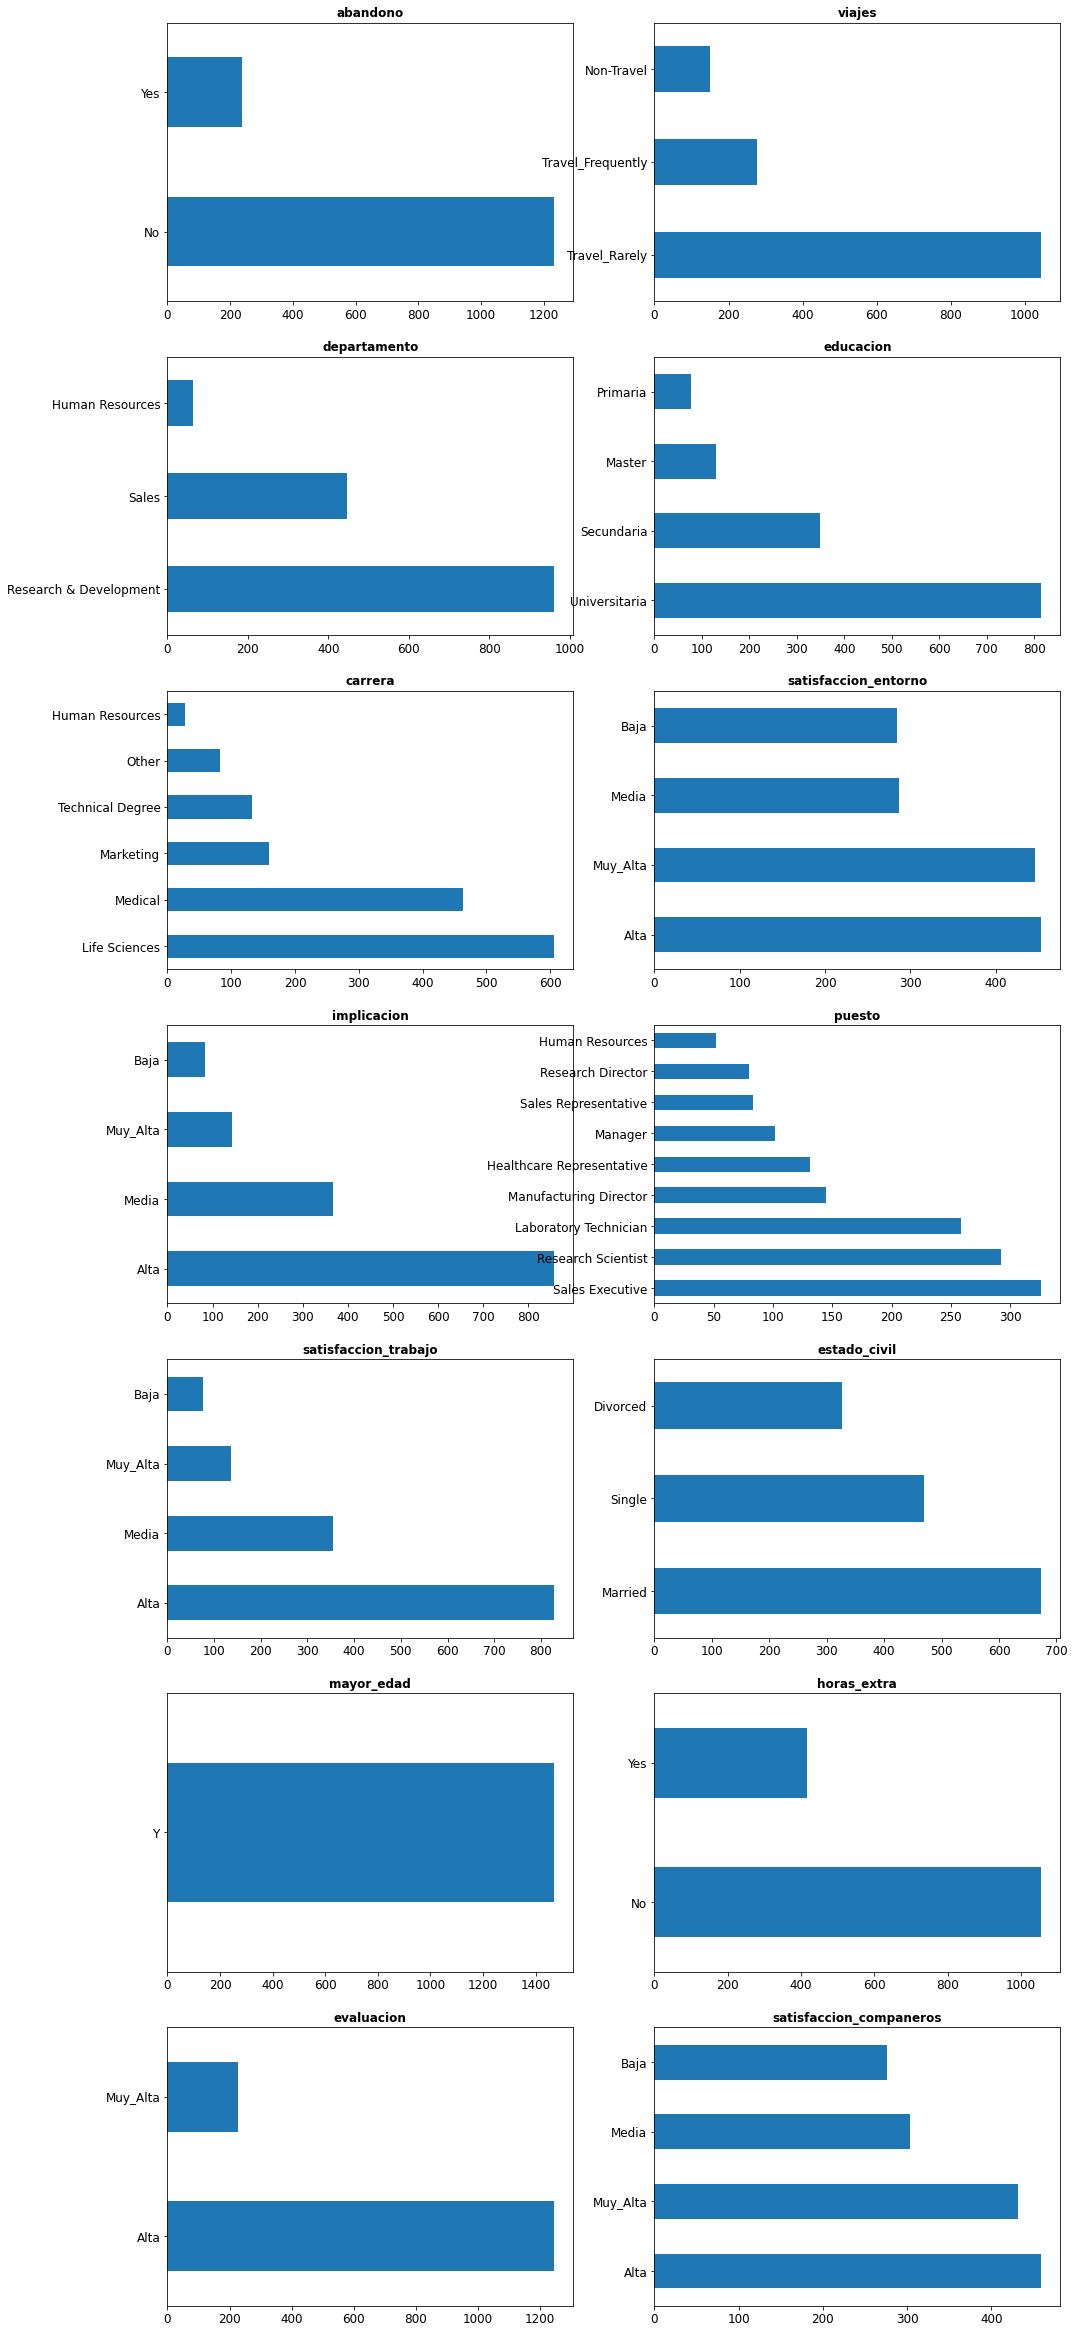

In [84]:
graficos_eda_categoricos(df.select_dtypes("O"))

Conclusiones:

* mayor_edad solo tiene un valor --> eliminarla
* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria'
  * satisfaccion_trabajo: imputar por 'Alta'
  * implicacion: imputar por 'Alta'

In [85]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

### EDA VARIABLES NUMERICAS

In [86]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [87]:
estadisticos_cont(df.select_dtypes("number"))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada

In [88]:
df.drop(columns=["empleados","sexo","horas_quincena"], inplace=True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3
